In [23]:
import pandas as pd
import pandas.plotting as pds
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data = pd.read_csv('./substr1.csv')

In [25]:
data.head()

,modDirectSearch,kmp,bmx,rabin_karp,aho_find_all,lib_find,textLen,subLen,index
0,0.000005,0.000006,0.000021,0.000022,0.000021,0.000000e+00,11,3,8
1,0.000003,0.000003,0.000004,0.000011,0.000012,0.000000e+00,11,3,5
2,0.000003,0.000004,0.000010,0.000008,0.000016,0.000000e+00,11,3,0
3,0.000003,0.000003,0.000006,0.000013,0.000017,9.536743e-07,11,3,2
4,0.000003,0.000005,0.000007,0.000020,0.000025,9.536743e-07,11,3,1


In [26]:
data.describe()

,modDirectSearch,kmp,bmx,rabin_karp,aho_find_all,lib_find,textLen,subLen,index
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.0,1000.0,1000.000000
mean,3.006458e-06,0.000004,0.000006,0.000013,0.000019,5.970001e-07,11.0,3.0,4.008000
std,1.885866e-06,0.000002,0.000003,0.000006,0.000037,9.644126e-07,0.0,0.0,2.640627
min,9.536743e-07,0.000002,0.000003,0.000004,0.000009,0.000000e+00,11.0,3.0,0.000000
25%,2.145767e-06,0.000003,0.000005,0.000010,0.000012,0.000000e+00,11.0,3.0,2.000000
50%,3.099442e-06,0.000004,0.000006,0.000013,0.000016,9.536743e-07,11.0,3.0,4.000000
75%,3.099442e-06,0.000005,0.000007,0.000016,0.000020,9.536743e-07,11.0,3.0,6.000000
max,3.004074e-05,0.000036,0.000029,0.000098,0.001145,1.907349e-05,11.0,3.0,8.000000


## modDirectSearch < kmp

In [27]:
data.sort_values(by='modDirectSearch', ascending = True).head()

,modDirectSearch,kmp,bmx,rabin_karp,aho_find_all,lib_find,textLen,subLen,index
999,9.536743e-07,0.000002,0.000003,0.000007,0.000011,9.536743e-07,11,3,2
637,9.536743e-07,0.000002,0.000003,0.000005,0.000012,0.000000e+00,11,3,0
463,9.536743e-07,0.000002,0.000004,0.000006,0.000012,0.000000e+00,11,3,0
656,9.536743e-07,0.000002,0.000003,0.000006,0.000012,1.192093e-06,11,3,0
941,9.536743e-07,0.000002,0.000004,0.000006,0.000011,0.000000e+00,11,3,0


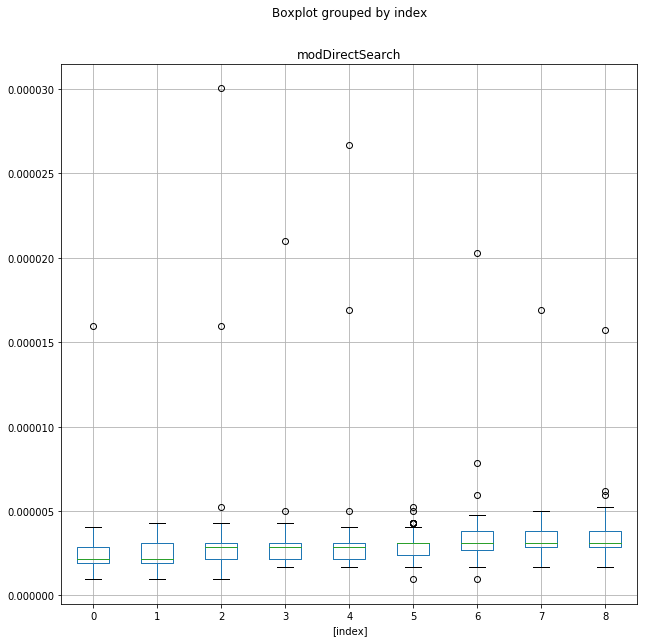

In [31]:
# data[['modDirectSearch', 'index']]
data.boxplot(column='modDirectSearch',  by=['index'], 
           figsize=(10,10))
plt.show()

## Поиск в начале

In [12]:
tb1 = data[data['index'] == 0]
tb1.head()

,modDirectSearch,kmp,bmx,rabin_karp,aho_find_all,lib_find,textLen,subLen,index
2,0.000003,0.000004,0.000010,0.000008,0.000016,0.000000e+00,11,3,0
10,0.000003,0.000004,0.000006,0.000012,0.000020,0.000000e+00,11,3,0
12,0.000003,0.000004,0.000005,0.000009,0.000019,0.000000e+00,11,3,0
14,0.000002,0.000003,0.000004,0.000006,0.000011,0.000000e+00,11,3,0
21,0.000002,0.000003,0.000004,0.000007,0.000015,9.536743e-07,11,3,0


In [13]:
tb1.describe()

,modDirectSearch,kmp,bmx,rabin_karp,aho_find_all,lib_find,textLen,subLen,index
count,1.210000e+02,1.210000e+02,121.000000,121.000000,121.000000,1.210000e+02,121.0,121.0,121.0
mean,2.364482e-06,3.170376e-06,0.000005,0.000009,0.000017,7.211669e-07,11.0,3.0,0.0
std,1.443889e-06,9.035008e-07,0.000002,0.000008,0.000009,1.771763e-06,0.0,0.0,0.0
min,9.536743e-07,1.668930e-06,0.000003,0.000004,0.000010,0.000000e+00,11.0,3.0,0.0
25%,1.907349e-06,2.622604e-06,0.000004,0.000006,0.000012,0.000000e+00,11.0,3.0,0.0
50%,2.145767e-06,3.099442e-06,0.000004,0.000007,0.000016,9.536743e-07,11.0,3.0,0.0
75%,2.861023e-06,3.814697e-06,0.000006,0.000010,0.000020,9.536743e-07,11.0,3.0,0.0
max,1.597404e-05,6.914139e-06,0.000019,0.000092,0.000082,1.907349e-05,11.0,3.0,0.0


## Поиск в конце

In [14]:
tb2 = data[(data['textLen'] - data['index']) <= 2]
tb2.head()

,modDirectSearch,kmp,bmx,rabin_karp,aho_find_all,lib_find,textLen,subLen,index


In [15]:
tb2.describe()

,modDirectSearch,kmp,bmx,rabin_karp,aho_find_all,lib_find,textLen,subLen,index
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Поиск в середине

In [16]:
tb3 = data[data['index'] == data['textLen'] // 2] 
tb3.head()

,modDirectSearch,kmp,bmx,rabin_karp,aho_find_all,lib_find,textLen,subLen,index
1,0.000003,0.000003,0.000004,0.000011,0.000012,0.000000e+00,11,3,5
5,0.000003,0.000004,0.000007,0.000015,0.000111,9.536743e-07,11,3,5
6,0.000004,0.000006,0.000007,0.000018,0.000023,9.536743e-07,11,3,5
28,0.000004,0.000004,0.000006,0.000012,0.000016,9.536743e-07,11,3,5
32,0.000004,0.000004,0.000007,0.000016,0.000020,0.000000e+00,11,3,5


In [17]:
tb3.describe()

,modDirectSearch,kmp,bmx,rabin_karp,aho_find_all,lib_find,textLen,subLen,index
count,1.070000e+02,1.070000e+02,107.000000,107.000000,107.000000,1.070000e+02,107.0,107.0,107.0
mean,3.025911e-06,4.153385e-06,0.000006,0.000014,0.000028,5.837913e-07,11.0,3.0,5.0
std,7.923785e-07,9.081883e-07,0.000002,0.000003,0.000109,5.097056e-07,0.0,0.0,0.0
min,9.536743e-07,2.622604e-06,0.000004,0.000009,0.000009,0.000000e+00,11.0,3.0,5.0
25%,2.384186e-06,3.814697e-06,0.000005,0.000012,0.000013,0.000000e+00,11.0,3.0,5.0
50%,3.099442e-06,4.053116e-06,0.000006,0.000013,0.000016,9.536743e-07,11.0,3.0,5.0
75%,3.099442e-06,4.768372e-06,0.000007,0.000016,0.000021,9.536743e-07,11.0,3.0,5.0
max,5.245209e-06,6.914139e-06,0.000020,0.000031,0.001145,1.192093e-06,11.0,3.0,5.0


In [18]:
tb = data

## modDirectSearch

/Users/romakindmitriy/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=11.0, right=11.0
  ax.set_xlim(boundaries_list[j])
/Users/romakindmitriy/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=3.0, right=3.0
  ax.set_xlim(boundaries_list[j])
/Users/romakindmitriy/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=11.0, top=11.0
  ax.set_ylim(boundaries_list[i])
/Users/romakindmitriy/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=11.0, rig

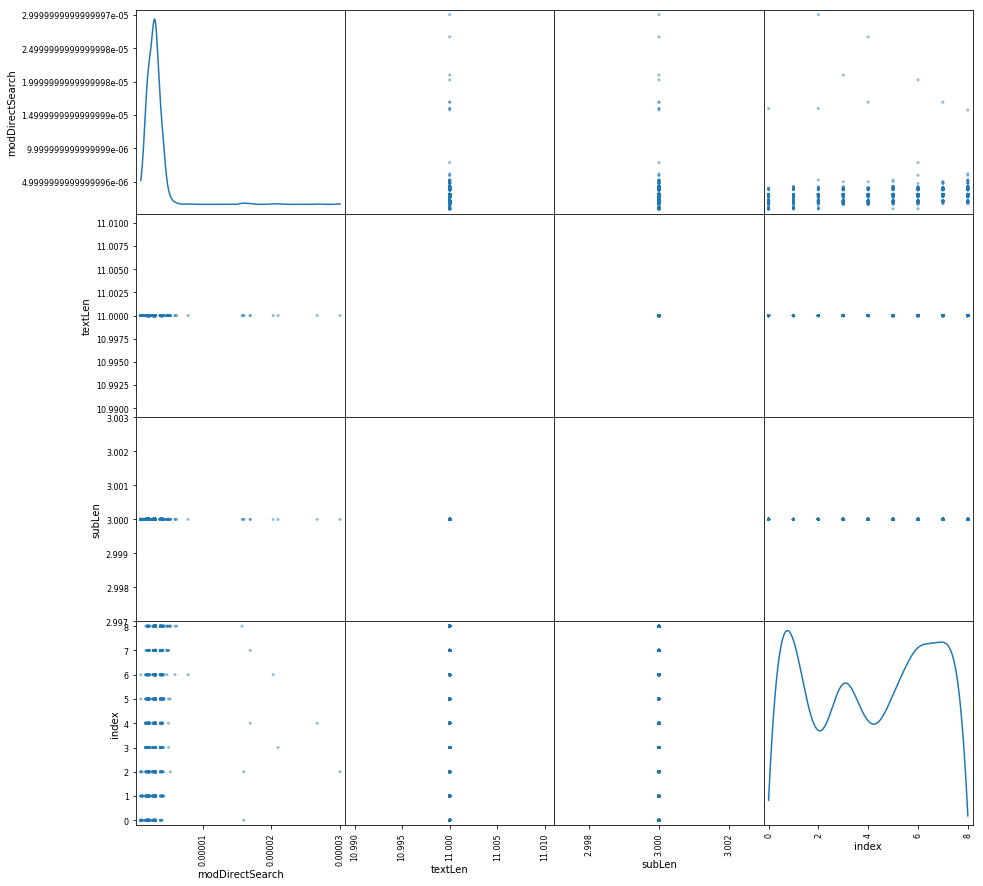

In [20]:
pds.scatter_matrix(tb.sort_values(by='modDirectSearch', ascending=True)[:100000][['modDirectSearch', 'textLen', 'subLen', 'index']], figsize=(15, 15), diagonal='kde')
plt.show()

## kmp

/Users/romakindmitriy/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=11.0, right=11.0
  ax.set_xlim(boundaries_list[j])
/Users/romakindmitriy/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=3.0, right=3.0
  ax.set_xlim(boundaries_list[j])
/Users/romakindmitriy/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=11.0, top=11.0
  ax.set_ylim(boundaries_list[i])
/Users/romakindmitriy/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=11.0, rig

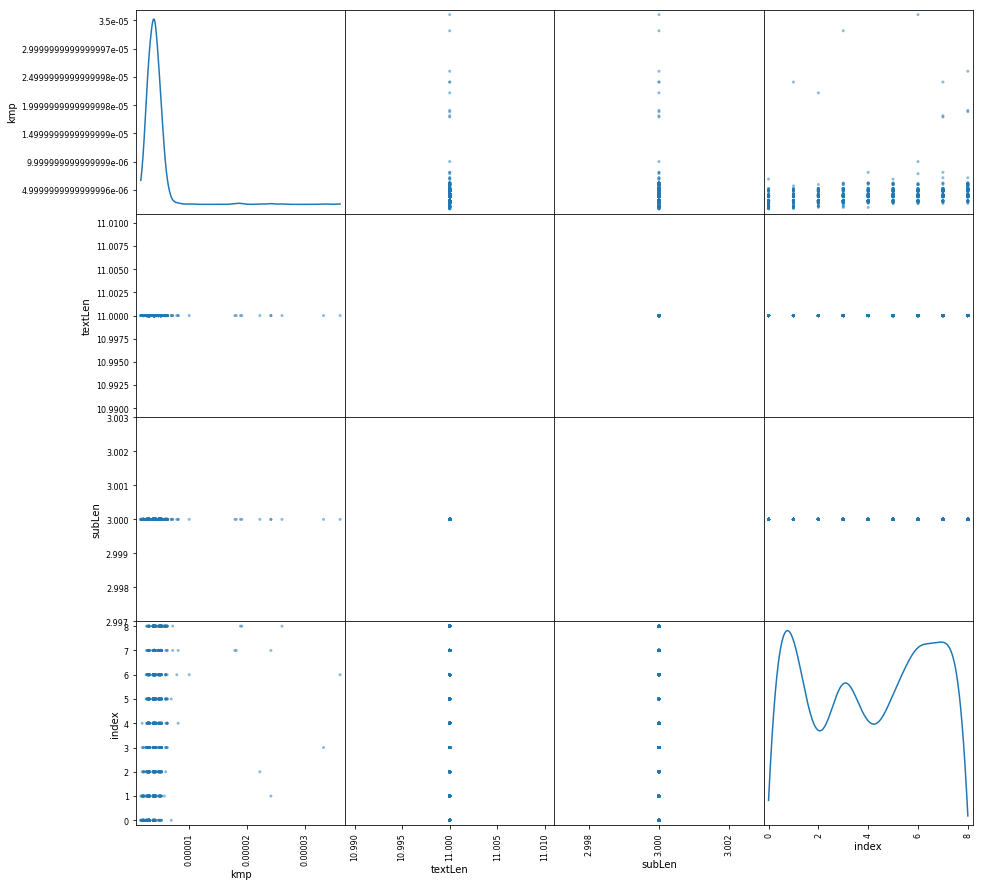

In [21]:
pds.scatter_matrix(tb.sort_values(by='kmp', ascending=True)[:100000][['kmp', 'textLen', 'subLen', 'index']], figsize=(15, 15), diagonal='kde')
plt.show()

## bmx

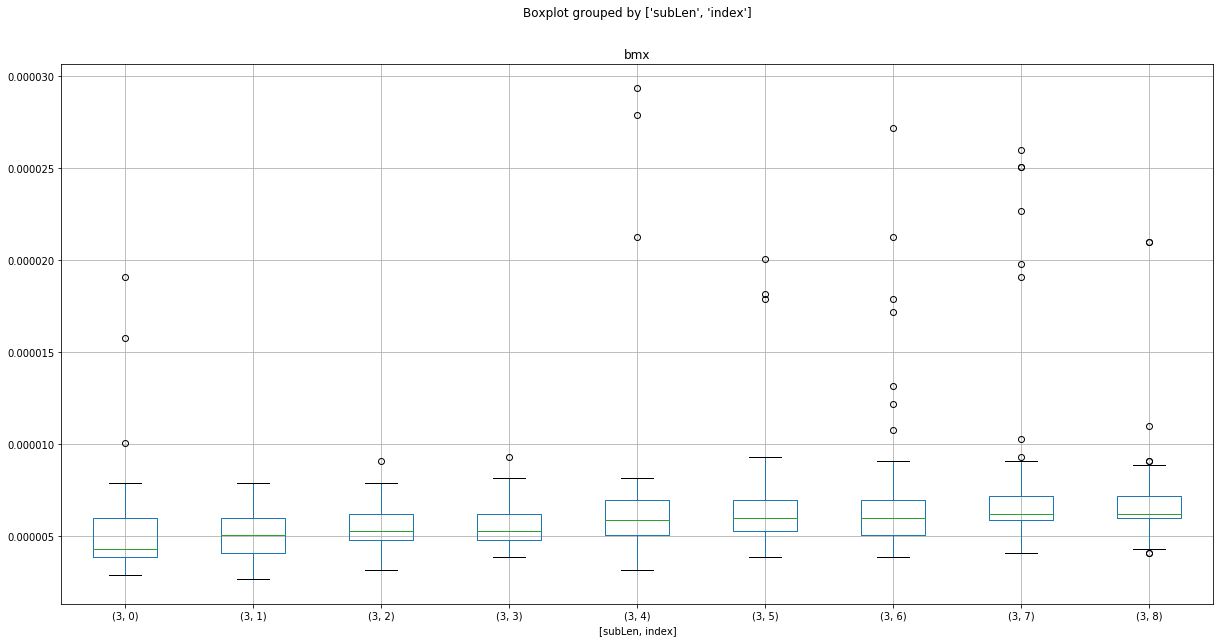

In [32]:
data[(data['textLen'] < 100)].boxplot(column='bmx',  by=['subLen', 'index'], figsize=(20,10))
# (data['textLen'] == 18)
plt.show()

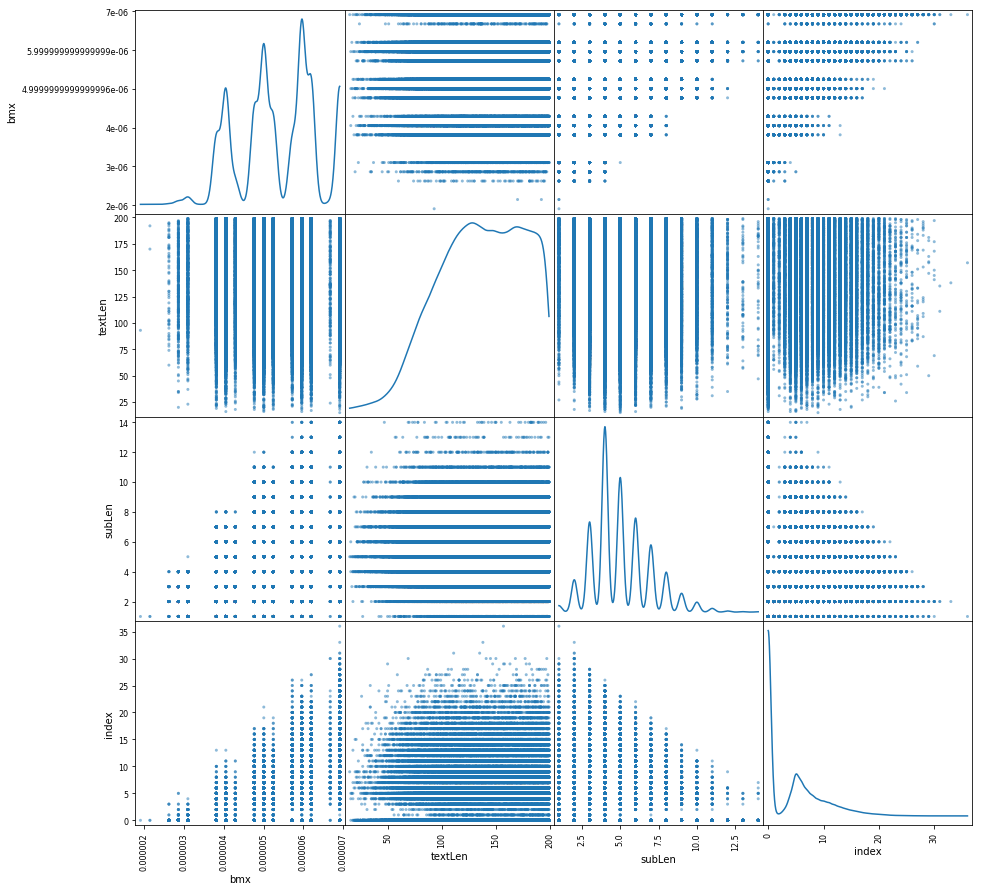

In [26]:
pds.scatter_matrix(tb.sort_values(by='bmx', ascending=True)[:100000][['bmx', 'textLen', 'subLen', 'index']], figsize=(15, 15), diagonal='kde')
plt.show()

## rabin_karp

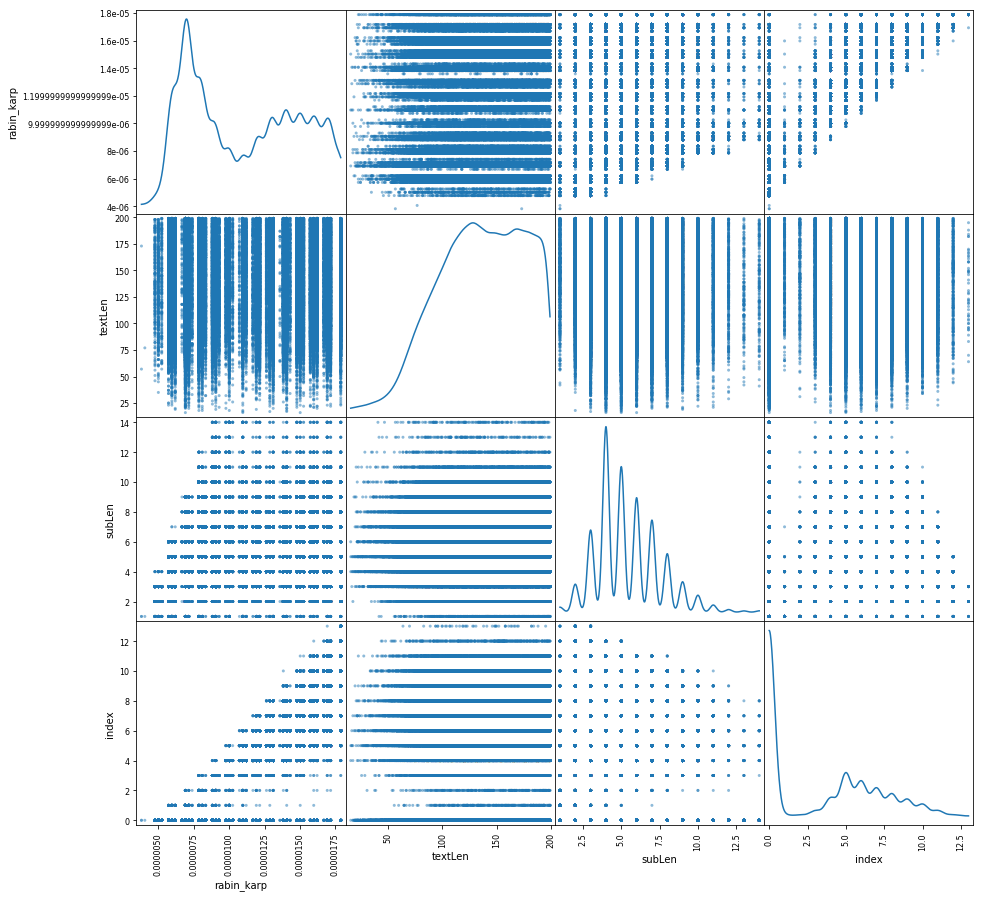

In [27]:
pds.scatter_matrix(tb.sort_values(by='rabin_karp', ascending=True)[:100000][['rabin_karp', 'textLen', 'subLen', 'index']], figsize=(15, 15), diagonal='kde')
plt.show()

## aho_find_all

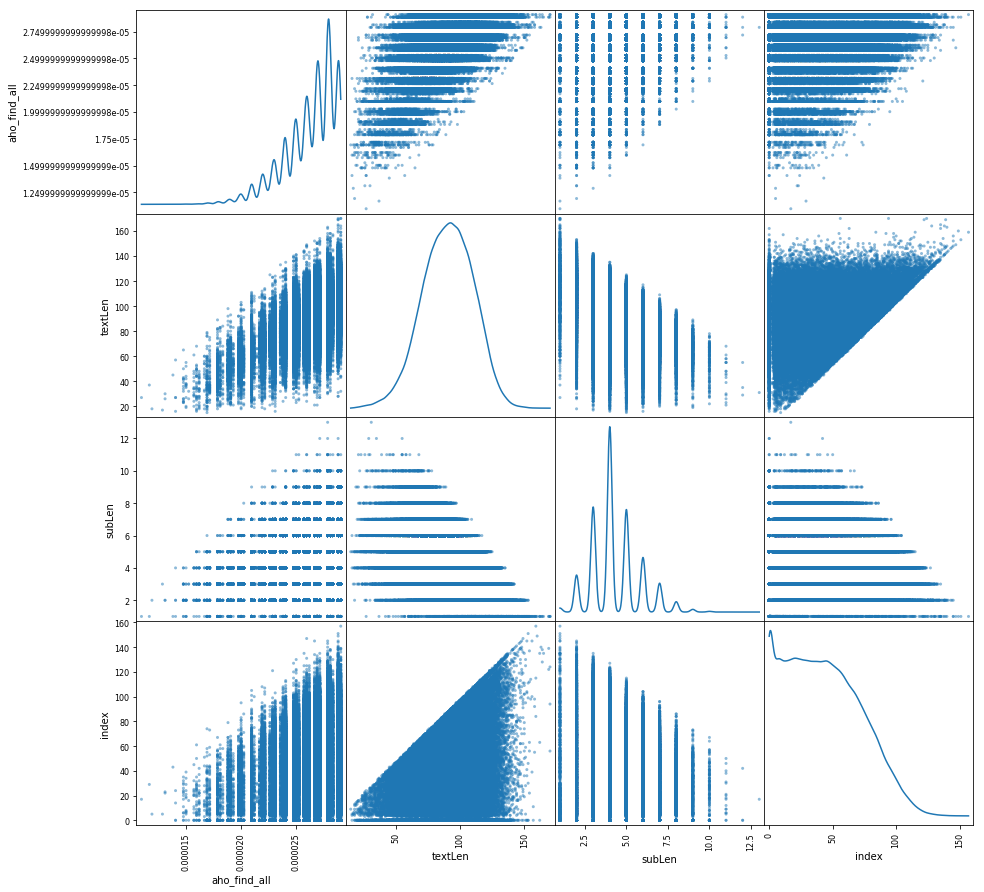

In [28]:
pds.scatter_matrix(tb.sort_values(by='aho_find_all', ascending=True)[:100000][['aho_find_all', 'textLen', 'subLen', 'index']], figsize=(15, 15), diagonal='kde')
plt.show()

## lib_find

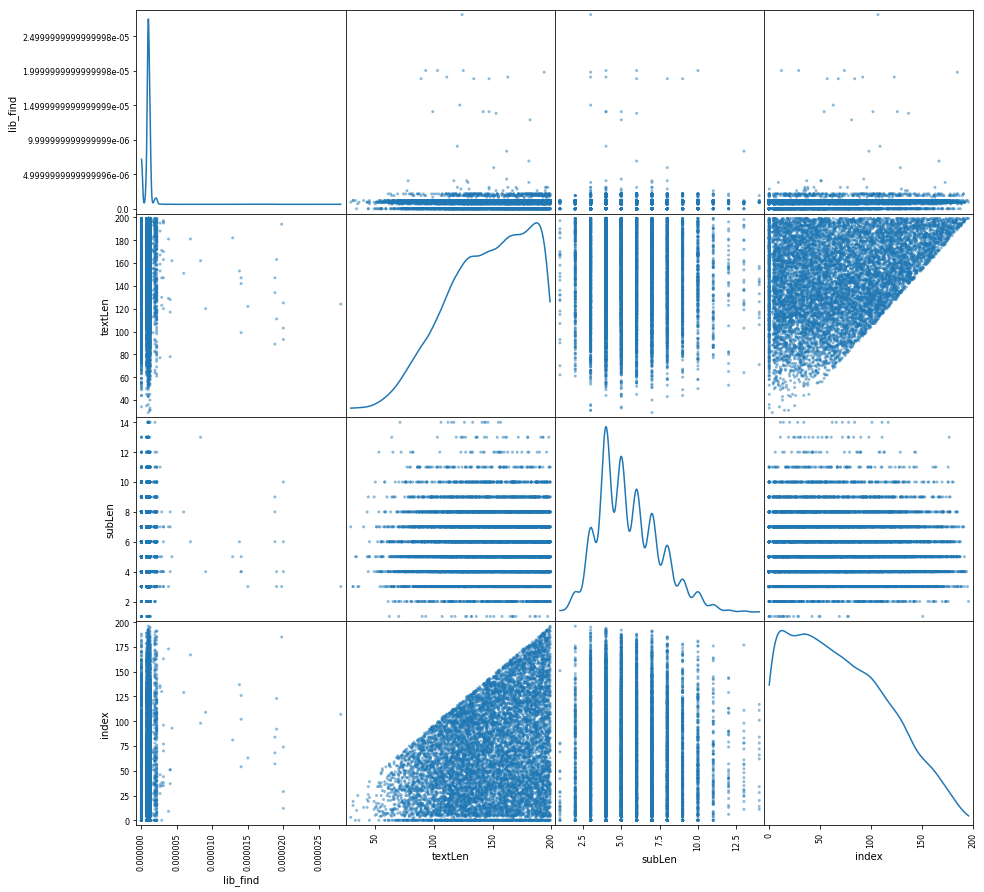

In [32]:
pds.scatter_matrix(tb[:10000][['lib_find', 'textLen', 'subLen', 'index']], figsize=(15, 15), diagonal='kde')
plt.show()

## Seaborn

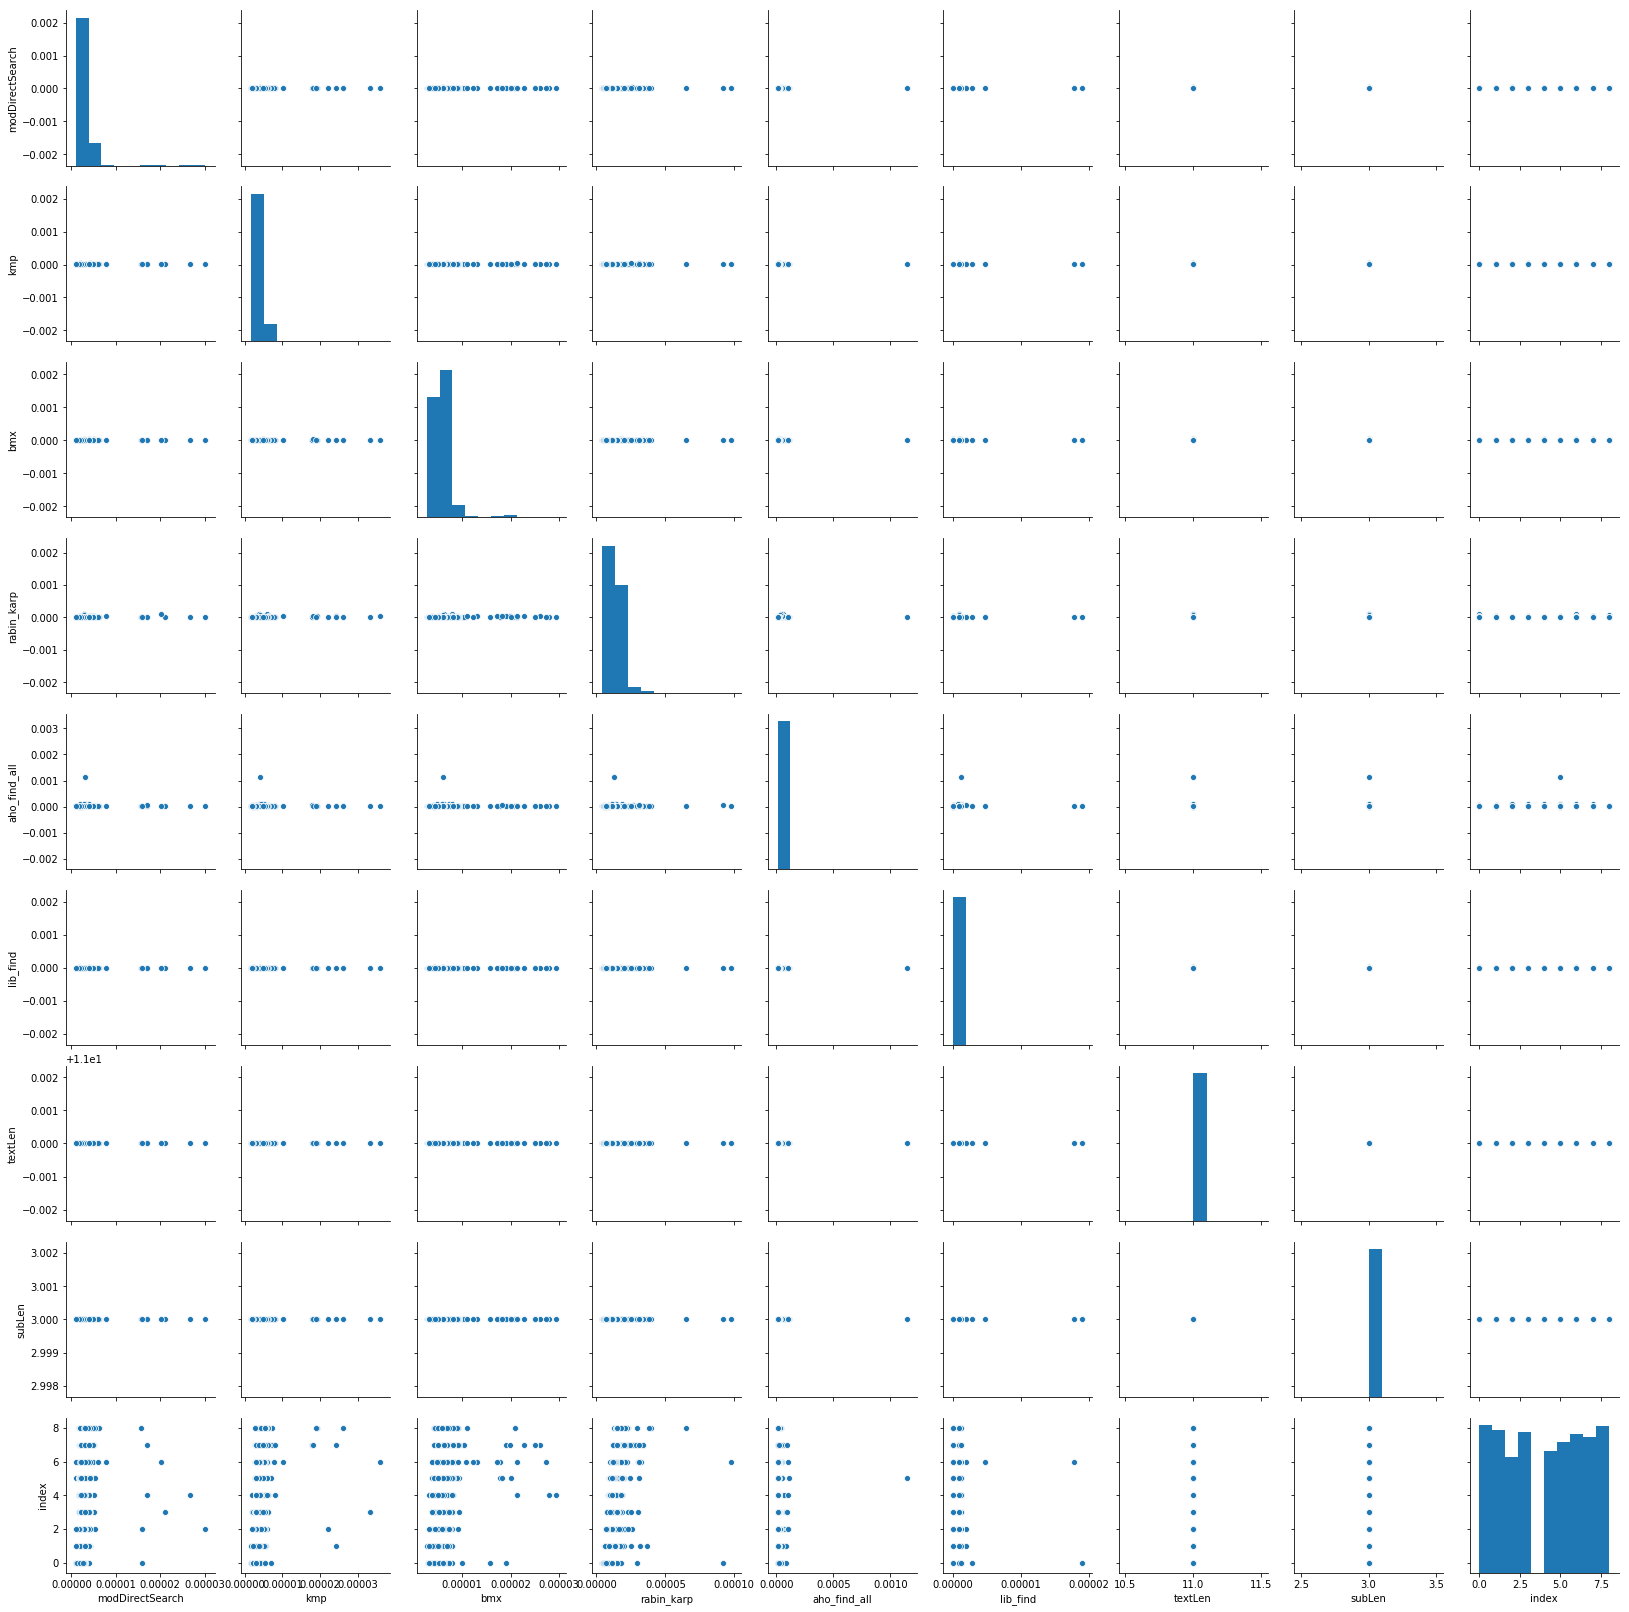

In [22]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(tb[:100000][['modDirectSearch', 'kmp', 'bmx', 'rabin_karp', 'aho_find_all', 'lib_find', 'textLen', 'subLen', 'index']]);